#### Inport the necessary libraries

In [2]:

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import pickle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torchvision.datasets as datasets
# import torchvision.transforms as transforms
# import os
# import PIL
# import pickle
# import matplotlib.pyplot as plt
# import numpy as np
# import random
# import cv2
# from torch.utils.data.dataset import Dataset
# from torch.utils.data import DataLoader
# import torchvision.transforms as transforms
# from torchvision.utils import make_grid
# import torch.utils.data.sampler as sampler
# from torch import nn, optim
# import torch.nn.functional as F
# %matplotlib inline

#### Load and prepare the data

In [2]:
# train = pd.read_csv('data/sign_mnist_train.csv')
# test = pd.read_csv('data/sign_mnist_test.csv')

In [34]:
# Load pickled data
training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [9]:
# X_train, X_test, X_valid = X_train/255, X_test/255, X_valid/255

In [4]:
#Define epochs for all models.
epochs = 20

In [35]:
# Number of training examples
n_train = len(X_train)
# Number of validation examples.
n_valid = len(X_valid)
# Number of testing examples.
n_test = len(X_test)

# The shape of an traffic sign image
image_shape = X_train[0].shape[:-1]

# Number of unique classes/labels in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Data exploration visualization.

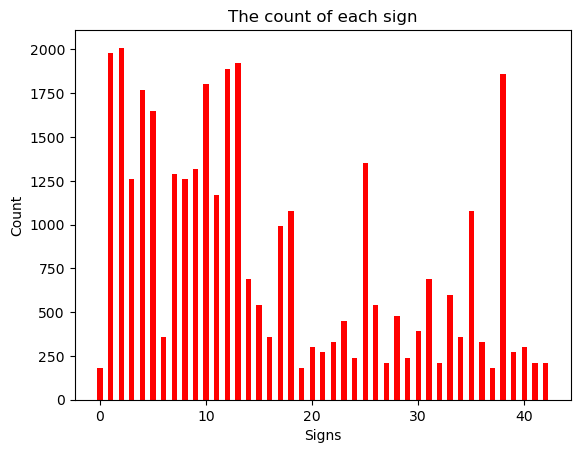

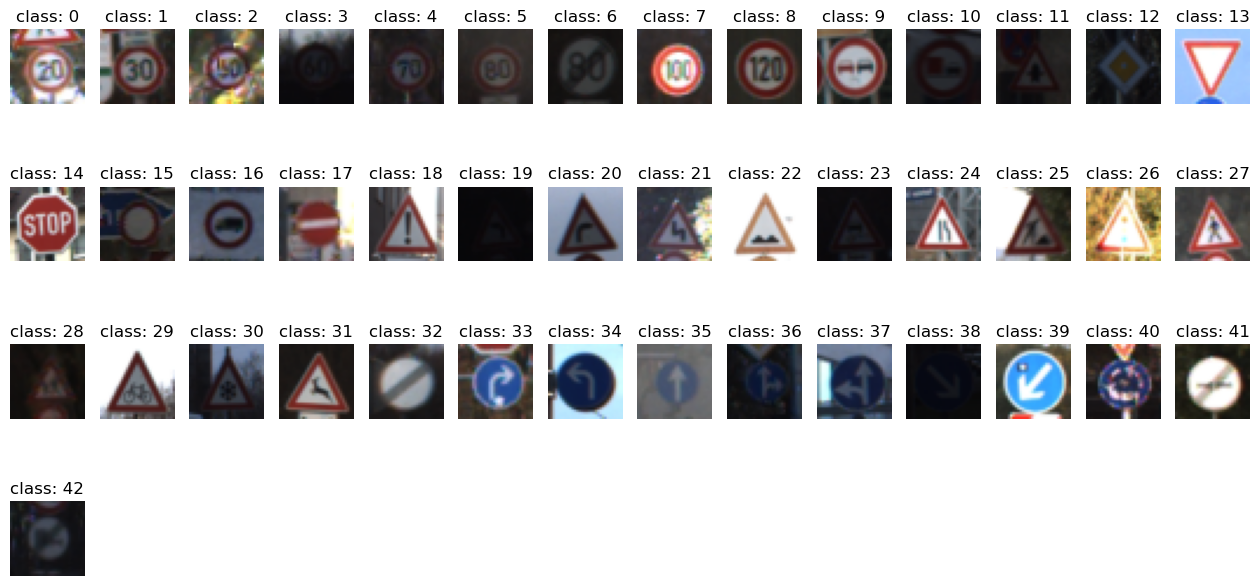

In [30]:
### Data exploration visualization.
fig, ax = plt.subplots()
ax.bar(range(n_classes), np.bincount(y_train), 0.5, color='r')
ax.set_xlabel('Signs')
ax.set_ylabel('Count')
ax.set_title('The count of each sign')
plt.show()

plt.figure(figsize=(16, 16))
for c in range(n_classes):
    i = random.choice(np.where(y_train == c)[0])
    plt.subplot(8, 14, c+1)
    plt.axis('off')
    plt.title('class: {}'.format(c))
    plt.imshow(X_train[i])

## Construct the first model


### Defining the first Convolutional Neural Network

In [31]:
import tensorflow as tf
import numpy as np
import pickle

# # Load the dataset from the Pickle file
# with open('dataset.pickle', 'rb') as f:
#     dataset = pickle.load(f)

# # Split the dataset into training and validation sets
# x_train = dataset['train_data']
# y_train = dataset['train_labels']
# x_val = dataset['val_data']
# y_val = dataset['val_labels']

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(43)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 128)       

In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
1088/1088 [==============================] - 15s 14ms/step - loss: 0.9437 - accuracy: 0.7722 - val_loss: 0.5413 - val_accuracy: 0.8848
Epoch 2/10
1088/1088 [==============================] - 14s 13ms/step - loss: 0.1513 - accuracy: 0.9606 - val_loss: 0.5204 - val_accuracy: 0.9000
Epoch 3/10
1088/1088 [==============================] - 15s 13ms/step - loss: 0.1125 - accuracy: 0.9721 - val_loss: 0.4301 - val_accuracy: 0.9134
Epoch 4/10
1088/1088 [==============================] - 15s 13ms/step - loss: 0.1008 - accuracy: 0.9755 - val_loss: 0.4680 - val_accuracy: 0.9336
Epoch 5/10
1088/1088 [==============================] - 15s 14ms/step - loss: 0.0873 - accuracy: 0.9785 - val_loss: 0.3360 - val_accuracy: 0.9347
Epoch 6/10
1088/1088 [==============================] - 13s 12ms/step - loss: 0.1019 - accuracy: 0.9765 - val_loss: 0.5567 - val_accuracy: 0.9340
Epoch 7/10
1088/1088 [==============================] - 15s 14ms/step - loss: 0.0774 - accuracy: 0.9829 - val_loss: 0.4961 -

### Let's save the model

In [34]:
model.save('saved_models/model.hdf5')

## LET'S CONTRUCT THE SECOND CNN MODEL 

###  Train the Second Model

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

In [45]:
model2 = tf.keras.models.Sequential([    
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(43, activation='softmax')])

In [58]:


lr = 0.001
epochs = 30

opt = tf.keras.optimizers.legacy.Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
model2.compile(loss='SparseCategoricalCrossentropy', optimizer=opt, metrics=['accuracy'])

#opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
#model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [59]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")



In [60]:
history = model2.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_valid, y_valid))

Epoch 1/30
1088/1088 [==============================] - 46s 42ms/step - loss: 0.9323 - accuracy: 0.7413 - val_loss: 0.2557 - val_accuracy: 0.9272
Epoch 2/30
1088/1088 [==============================] - 38s 35ms/step - loss: 0.1593 - accuracy: 0.9516 - val_loss: 0.1588 - val_accuracy: 0.9537
Epoch 3/30
1088/1088 [==============================] - 44s 40ms/step - loss: 0.0949 - accuracy: 0.9705 - val_loss: 0.1602 - val_accuracy: 0.9621
Epoch 4/30
1088/1088 [==============================] - 49s 45ms/step - loss: 0.0741 - accuracy: 0.9766 - val_loss: 0.1125 - val_accuracy: 0.9667
Epoch 5/30
1088/1088 [==============================] - 46s 42ms/step - loss: 0.0611 - accuracy: 0.9810 - val_loss: 0.0473 - val_accuracy: 0.9862
Epoch 6/30
1088/1088 [==============================] - 46s 42ms/step - loss: 0.0446 - accuracy: 0.9859 - val_loss: 0.0742 - val_accuracy: 0.9810
Epoch 7/30
1088/1088 [==============================] - 45s 42ms/step - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.0824 -

## Save the second the model

In [61]:
model2.save('saved_models/model2.hdf5')

## Let's construct the third model (AlexNet)

In [91]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend as K
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(4,4), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(4,4), strides=(2,2), padding='same'))


#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(4,4), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())

# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(43))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization_13 (Bat  (None, 8, 8, 96)         384       
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_14 (Bat  (None, 4, 4, 256)       

### Compiling the model

In [98]:
AlexNet.compile(loss='SparseCategoricalCrossentropy', optimizer= 'adam', metrics=['accuracy'])

### Learning Rate Annealer

In [99]:
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',    patience=4,  min_lr=1e-5) 
#earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

### Defining the hyperparameters

In [100]:
batch_size= 100
epochs=20
learn_rate=.001

### Training the model

In [101]:
history=AlexNet.fit(X_train, y_train, epochs = epochs, validation_data=(X_valid, y_valid), callbacks=[lrr], verbose=1)

Epoch 1/20
1088/1088 [==============================] - 404s 369ms/step - loss: 2.8345 - accuracy: 0.2299 - val_loss: 2.2370 - val_accuracy: 0.3472 - lr: 0.0010
Epoch 2/20
1088/1088 [==============================] - 389s 358ms/step - loss: 1.7312 - accuracy: 0.4860 - val_loss: 1.8338 - val_accuracy: 0.4791 - lr: 0.0010
Epoch 3/20
1088/1088 [==============================] - 387s 356ms/step - loss: 1.3124 - accuracy: 0.6071 - val_loss: 1.8876 - val_accuracy: 0.4646 - lr: 0.0010
Epoch 4/20
1088/1088 [==============================] - 381s 350ms/step - loss: 1.0707 - accuracy: 0.6790 - val_loss: 1.1430 - val_accuracy: 0.6868 - lr: 0.0010
Epoch 5/20
1088/1088 [==============================] - 382s 351ms/step - loss: 0.8822 - accuracy: 0.7373 - val_loss: 1.1359 - val_accuracy: 0.6864 - lr: 0.0010
Epoch 6/20
1088/1088 [==============================] - 382s 351ms/step - loss: 0.7375 - accuracy: 0.7836 - val_loss: 1.2444 - val_accuracy: 0.6576 - lr: 0.0010
Epoch 7/20
1088/1088 [============

In [104]:
AlexNet.save('saved_models/alexnet_model.hdf5')

## ResNet50 Transfer learning model. You may use it as an alternative model if you have the computational power to train it.

In [ ]:
# from tensorflow import keras
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications.resnet50 import ResNet50

# # Load pre-trained ResNet50 model
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# # Freeze all layers in the pre-trained model
# for layer in base_model.layers:
#     layer.trainable = True

# # Add custom classification head on top of pre-trained model
# x = Flatten()(base_model.output)
# x = Dense(256, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
# #x = Dense(2048, activation='relu')(x)
# #x = Dense(1024, activation='relu')(x)
# output = Dense(43, activation='softmax')(x)

# # Create new model
# resnet_model = Model(inputs=base_model.input, outputs=output)

# # Compile the model
# resnet_model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])
# resnet_model.summary()


## Also InceptionV5 Transfer learning model. You may use it as an alternative model if you have the computational power to train it.

In [ ]:
# Incep_model.compile(optimizer='adam', 
#               loss=[losses.sparse_categorical_crossentropy,
#                     losses.sparse_categorical_crossentropy,
#                     losses.sparse_categorical_crossentropy],
#               loss_weights=[1, 0.3, 0.3],
#               metrics=['accuracy'])

## Let's load all the saved models

In [174]:

### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('saved_models/model.hdf5')
model2 = load_model('saved_models/model2.hdf5')
model3 = load_model('saved_models/alexnet_model.hdf5')



#### Let's add all the models as a list so that we can iterate through them 

In [175]:
models = [model1, model2, model3]


### Let's see the test prediction of each  model

In [176]:
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

395/395 [==============================] - 8s 19ms/step


In [177]:
print(preds) ## Prediction of each model in a numpy array format

[[[-6.24414940e+01 -3.32880282e+00 -1.02155828e+01 ...  1.32309618e+01
   -7.18948059e+01 -4.13557472e+01]
  [ 1.36997360e+02  2.30662506e+02  1.05207672e+02 ... -1.11479509e+00
   -1.53176453e+02 -5.72078285e+01]
  [-9.62647476e+01 -2.58067226e+01 -8.07042027e+00 ...  8.02395020e+01
    6.40364380e+01 -3.95473938e+01]
  ...
  [-6.88668680e+00  3.71666670e-01 -3.02827263e+00 ...  4.50491381e+00
   -3.82560587e+00 -2.68707657e+00]
  [-5.00848198e+00  6.83761406e+00  7.65776396e+00 ...  5.08260441e+00
   -2.10639114e+01 -9.99346161e+00]
  [-1.11762190e+01 -4.04192924e+00  2.86817026e+00 ... -6.77154207e+00
   -4.67121935e+00 -9.36161613e+00]]

 [[ 5.10243881e-15  3.58088342e-12  1.07171839e-15 ...  5.92109532e-13
    9.36978902e-13  1.41391863e-11]
  [ 3.62737063e-10  9.99999940e-01  1.36107748e-12 ...  5.80628539e-16
    2.59493815e-13  8.59813986e-16]
  [ 6.61128999e-11  3.96492523e-15  1.79757659e-18 ...  3.58135762e-14
    3.05671721e-12  1.31585606e-13]
  ...
  [ 8.18846183e-06  1.1

In [178]:
print(summed)

[[ -62.44147      -3.3288012   -10.215583   ...   13.230973
   -71.894806    -41.355747  ]
 [ 136.9976      232.63277     105.21767    ...   -1.1145669
  -153.1763      -57.207767  ]
 [ -96.26475     -25.806717     -8.070419   ...   80.2395
    64.03644     -39.547394  ]
 ...
 [  -6.8850756     0.37550905   -2.8846235  ...    4.505479
    -3.8222547    -2.673556  ]
 [  -5.0083237     6.8386827     7.6593103  ...    5.0829167
   -21.063572     -9.992927  ]
 [ -11.176216     -4.0419164     2.8681781  ...   -6.771533
    -4.6712146    -9.361573  ]]


### Let's check the sum of the prediction for each image in each class

In [179]:
# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

In [180]:
print(ensemble_prediction.shape)

(12630,)


In [181]:
ensemble_prediction

array([16,  1, 38, ...,  6,  7, 10])

### Let's see the prediction of each indvidual model

In [182]:
#y_test_arg=np.argmax(y_test,axis=1)
prediction1 = np.argmax(model1.predict(X_test),axis=1)
prediction2 = np.argmax(model2.predict(X_test),axis=1)
prediction3 = np.argmax(model3.predict(X_test),axis=1)

395/395 [==============================] - 8s 19ms/step


In [183]:
print(prediction1.shape)
print(prediction2.shape)
print(prediction3.shape)
print(ensemble_prediction.shape)

(12630,)
(12630,)
(12630,)
(12630,)


### Check the data types of y_test, prediction1, prediction2, and prediction3

In [184]:
print(type(y_test))
print(type(prediction1))
print(type(prediction2))
print(type(prediction3))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Let's  Compute the accuracy scores for all the model plus their ensemble accuracy score

In [185]:
accuracy1 = accuracy_score(y_test, prediction1)
accuracy2 = accuracy_score(y_test, prediction2)
accuracy3 = accuracy_score(y_test, prediction3)
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

In [186]:
print(f'Accuracy Score for model1= {accuracy1*100:.2f}%')
print(f'Accuracy Score for model2= {accuracy2*100:.2f}%')
print(f'Accuracy Score for model3= {accuracy3*100:.2f}%')
print(f'Accuracy Score for average ensemble= {ensemble_accuracy*100:.2f}%')


Accuracy Score for model1= 94.22%
Accuracy Score for model2= 98.04%
Accuracy Score for model3= 82.80%
Accuracy Score for average ensemble= 94.97%


## Confusion Matrix for Model 1

Confusion Matrix


<AxesSubplot:>

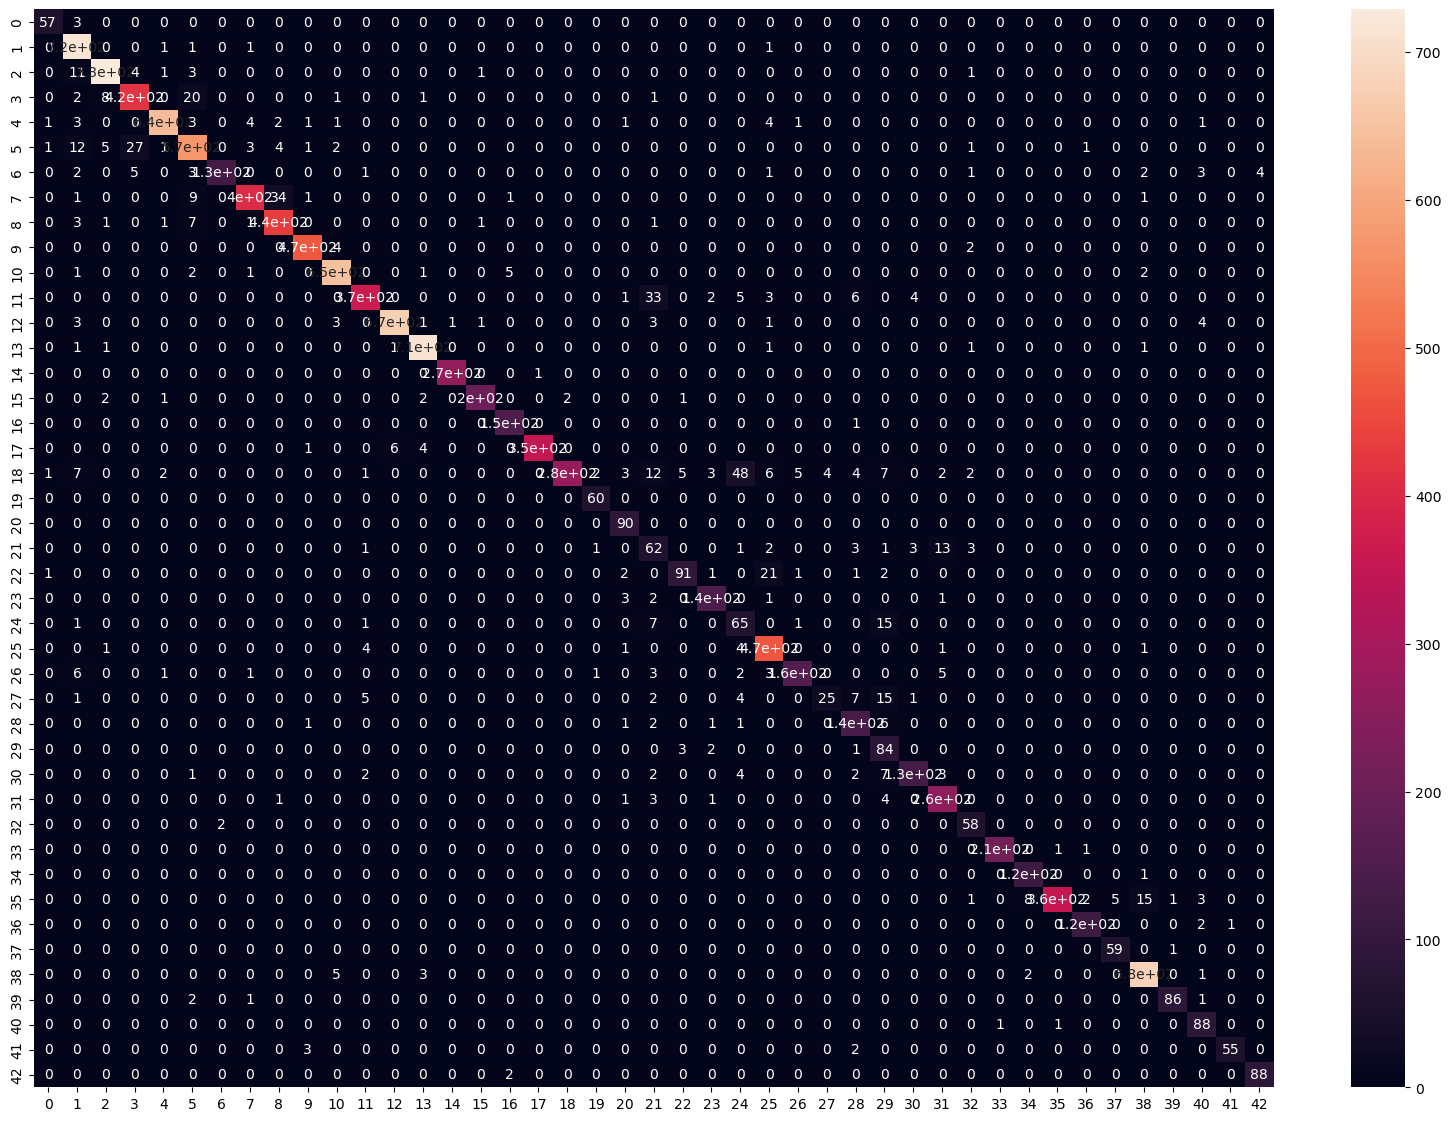

In [197]:
#y_test_arg=np.argmax(y_test,axis=1)
from sklearn.metrics import confusion_matrix
import seaborn as sns
print('Confusion Matrix')
cm = confusion_matrix(y_test, prediction1)

plt.figure(figsize = (20,14))
sns.heatmap(cm, annot=True)


## Confusion Matrix for Model 2

Confusion Matrix


<AxesSubplot:>

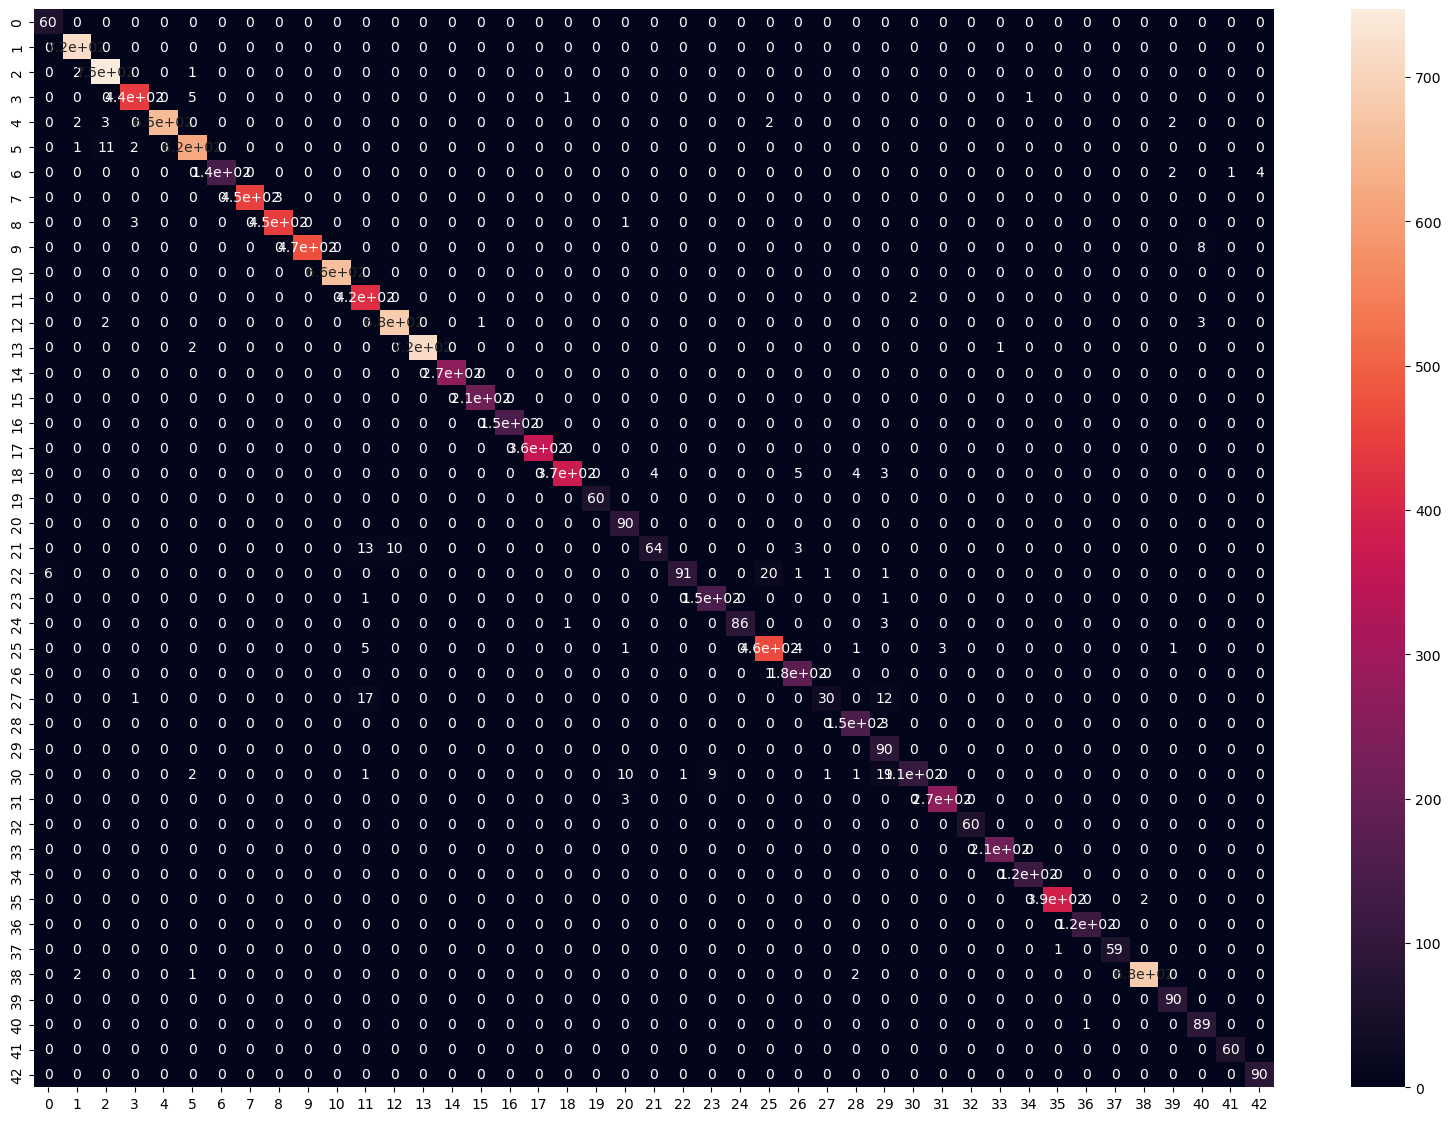

In [198]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
print('Confusion Matrix')
cm = confusion_matrix(y_test, prediction2)

plt.figure(figsize = (20,14))
sns.heatmap(cm, annot=True)


## Confusion Matrix for Model 3

Confusion Matrix


<AxesSubplot:>

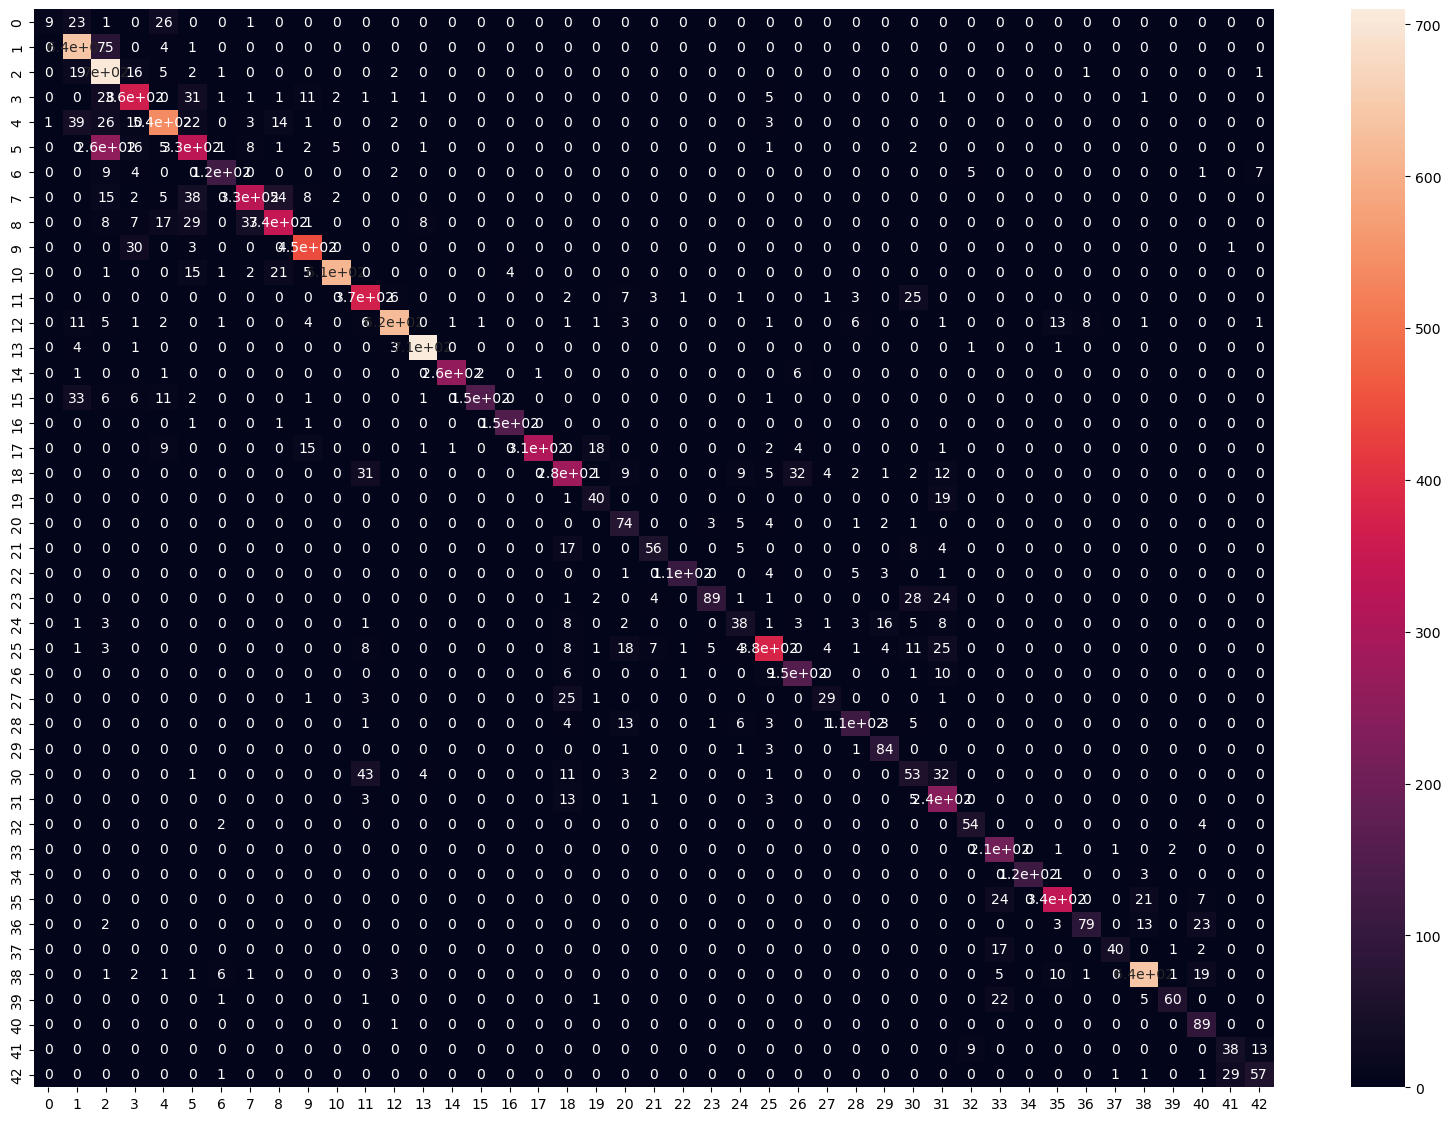

In [199]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print('Confusion Matrix')
cm = confusion_matrix(y_test, prediction3)

plt.figure(figsize = (20,14))
sns.heatmap(cm, annot=True)


## Confusion Matrix for the ensemble Model

Confusion Matrix


<AxesSubplot:>

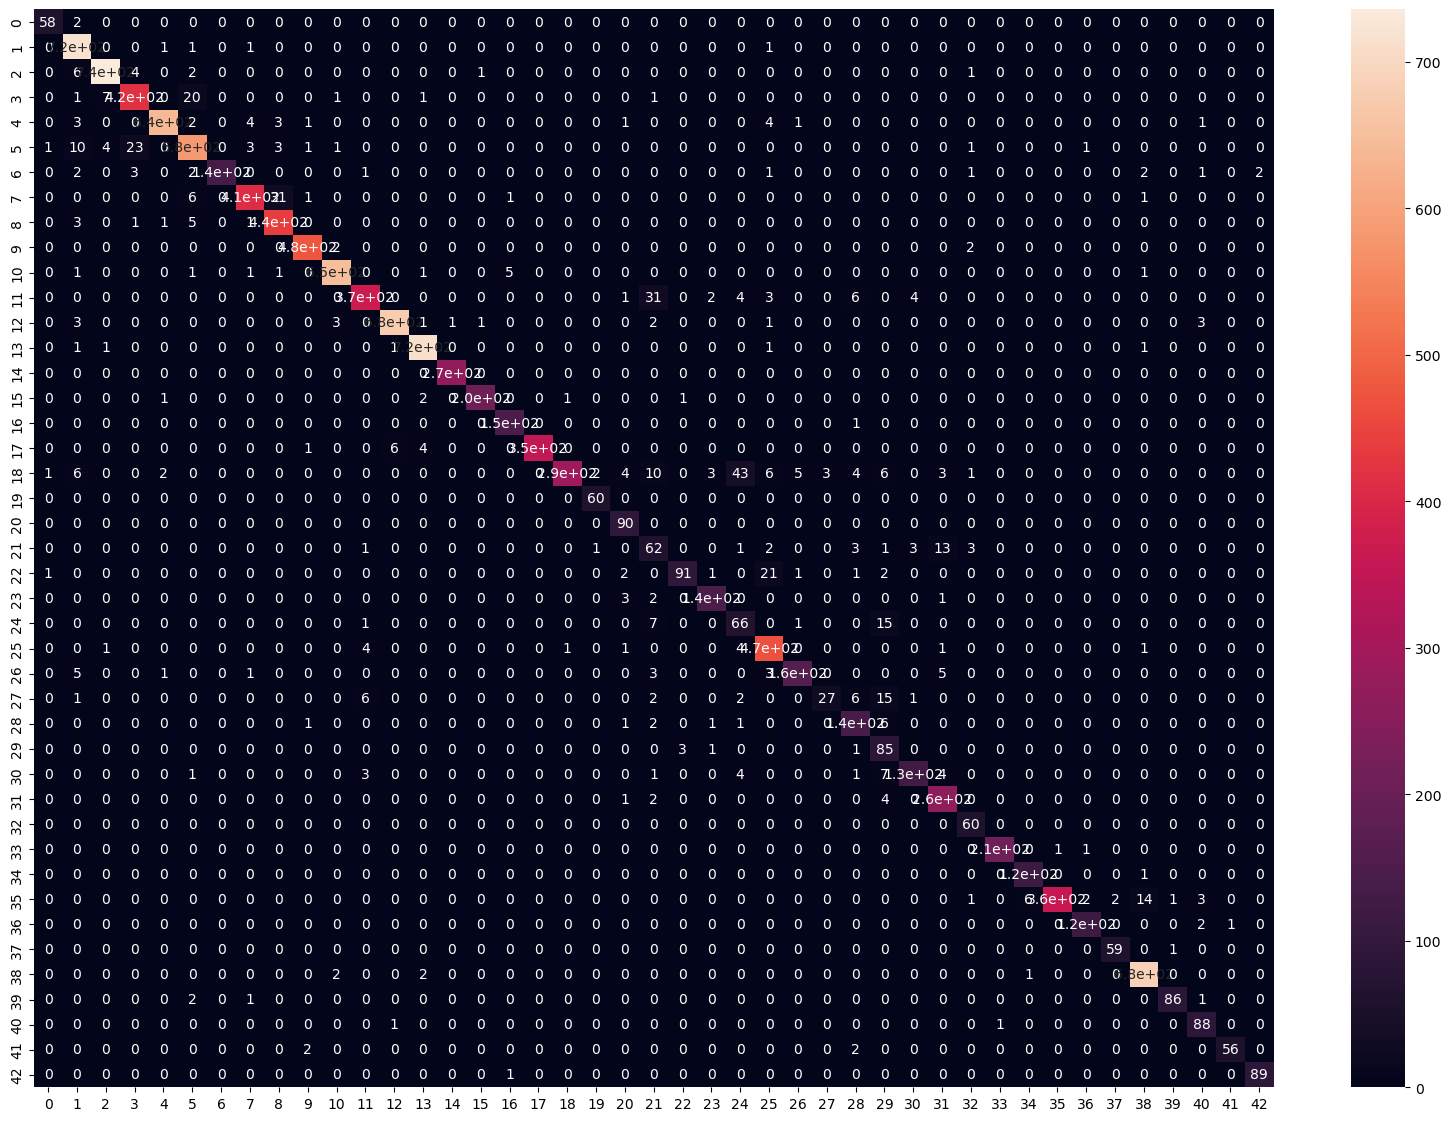

In [200]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print('Confusion Matrix')
cm = confusion_matrix(y_test, ensemble_prediction)

plt.figure(figsize = (20,14))
sns.heatmap(cm, annot=True)


# Let's compute the Weighted average ensemble of all the model

#### We are basically going to do the same as when computing the accuracy except that in this time, we are adding a weight for each model

In [201]:
models = [model1, model2, model3]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

395/395 [==============================] - 8s 19ms/step


### Let's compute the accuracy score of the ensemble model when we add a weighted sum to it

In [205]:
#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))  # "tensordot" is a python function that sums up the product  of  all the elements. Here, it sums up the multiplications of the predictions and the weights
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(y_test, weighted_ensemble_prediction)

In [206]:
print(f'Accuracy Score for model1= {accuracy1*100:.2f}%')
print(f'Accuracy Score for model2= {accuracy2*100:.2f}%')
print(f'Accuracy Score for model3= {accuracy3*100:.2f}%')
print(f'Accuracy Score for average ensemble= {ensemble_accuracy*100:.2f}%')
print(f'Accuracy Score for weighted average ensemble= {weighted_accuracy*100:.2f}%')


Accuracy Score for model1= 94.22%
Accuracy Score for model2= 98.04%
Accuracy Score for model3= 82.80%
Accuracy Score for average ensemble= 94.97%
Accuracy Score for weighted average ensemble= 94.74%


## Let's do some hyperparameter optimizations. We are using "Grid search" method to look for the best combination of w1, w2, w3 that gives maximum acuracy

In [213]:
models = [model1, model2, model3]
preds1 = [model.predict(X_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(y_test, wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[0], " obained with w1=", max_acc_row[1],
      " w2=", max_acc_row[2], " and w3=", max_acc_row[3])         


395/395 [==============================] - 8s 20ms/step
Max accuracy of  0.0  obained with w1= 0.3  w2= 0.1  and w3= 98.05225653206651


### Explore metrics for the ideal weighted ensemble model. 

In [214]:
models = [model1, model2, model3]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2] 


395/395 [==============================] - 7s 19ms/step


### Use tensordot to sum the products of all elements over specified axes.

In [215]:

ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(y_test, ideal_weighted_ensemble_prediction)


In [217]:
class_names = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Let's see the accuracy of our ensemble model by trying to predict some of these images randomly.

Predicted Label:  Yield
True Label:  Yield


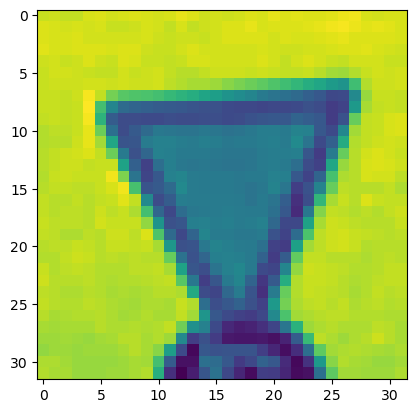

In [221]:
i = random.randint(3,len(ideal_weighted_ensemble_prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

In [222]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, ideal_weighted_ensemble_prediction)

<AxesSubplot:>

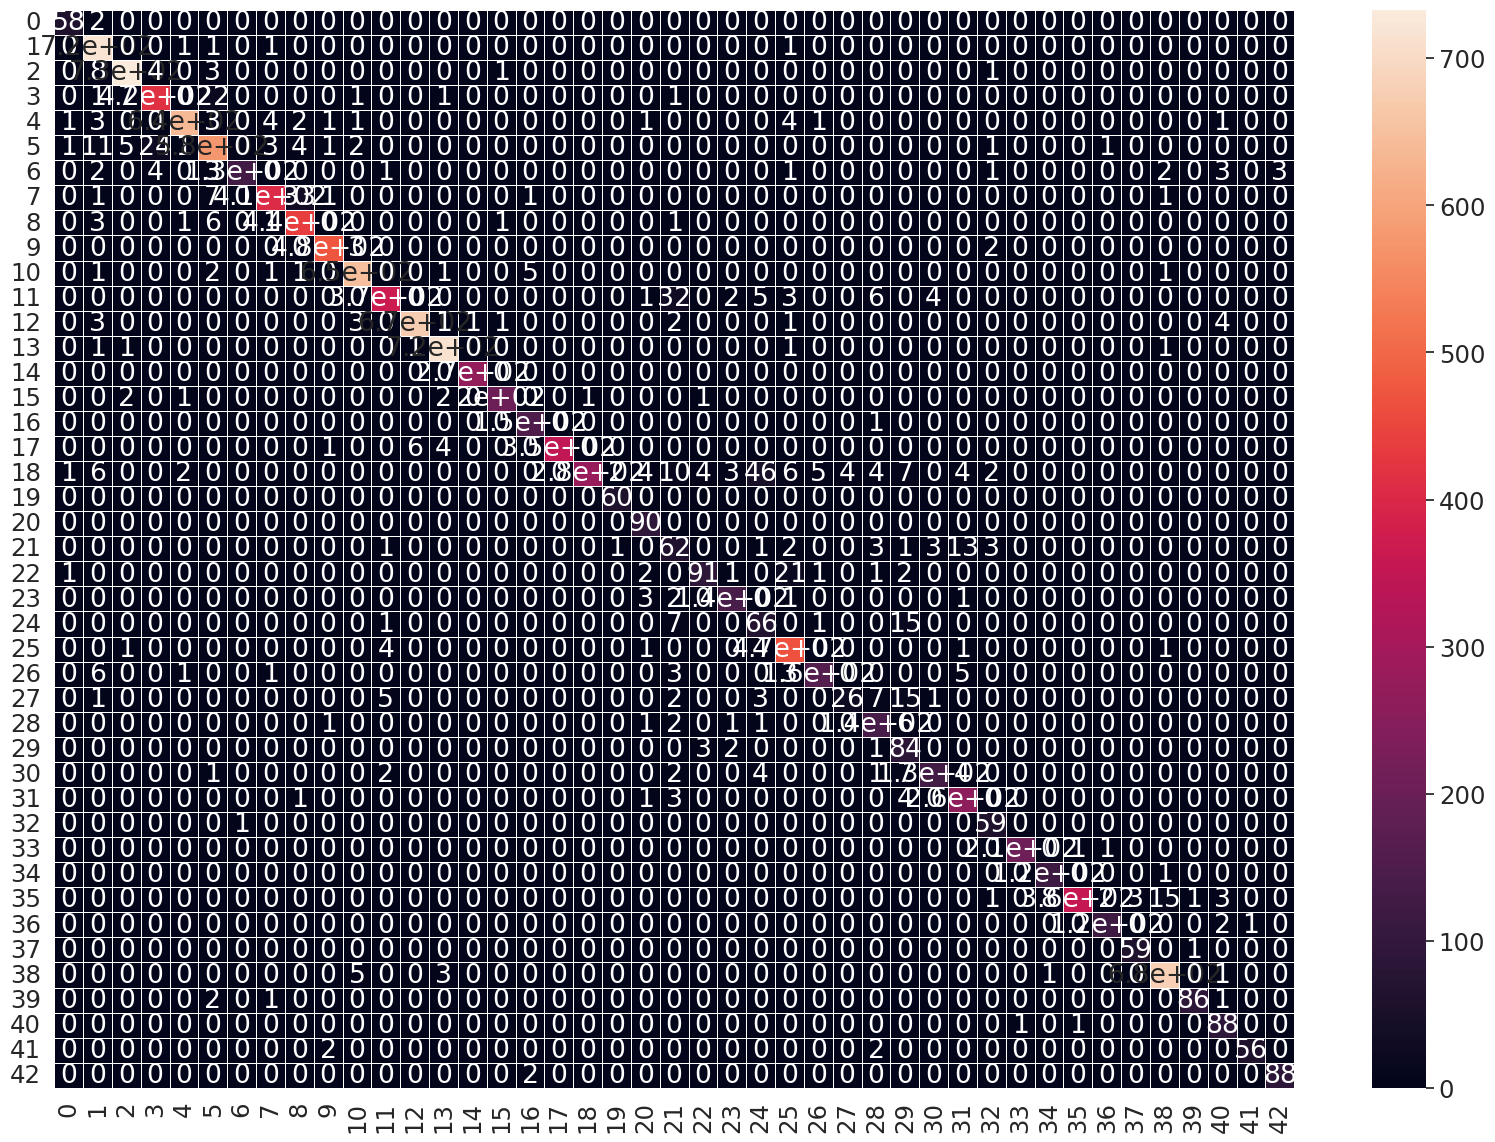

In [224]:
fig, ax = plt.subplots(figsize=(20,14))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


### Let PLot fractional incorrect misclassifications for each class in our dataset

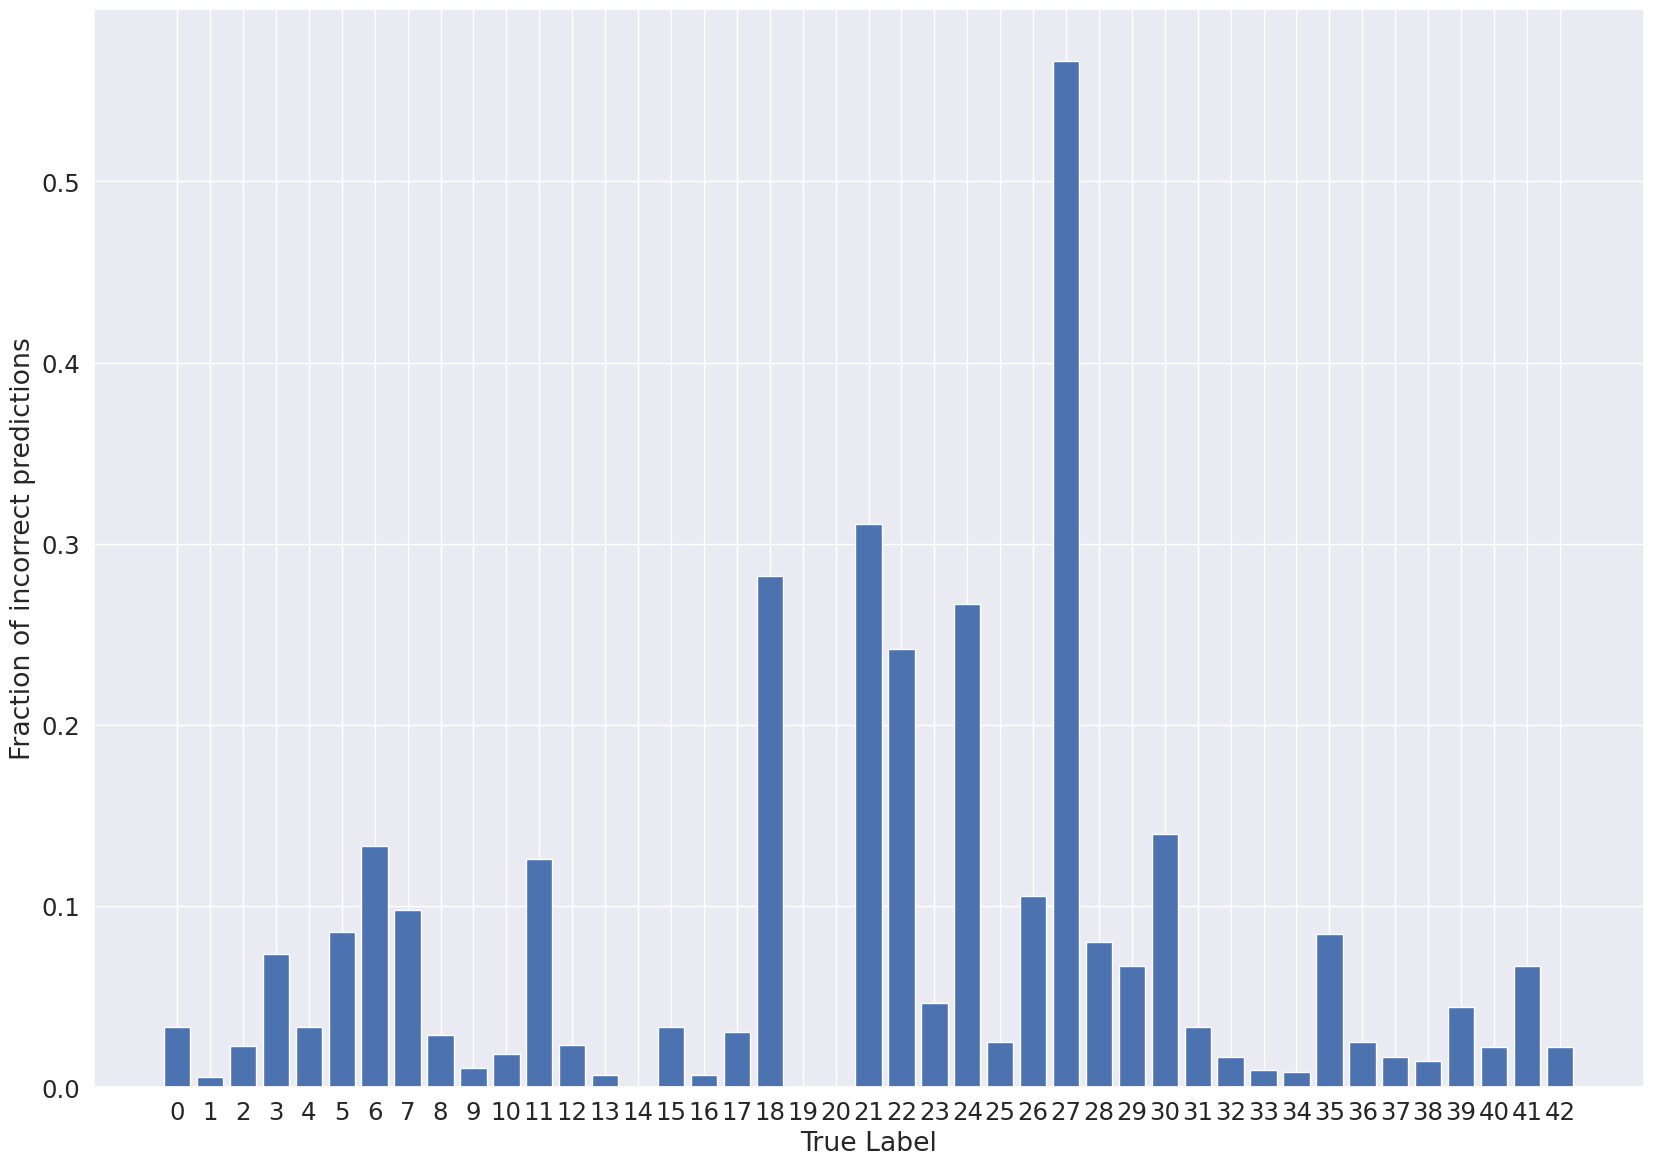

In [228]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(20,14))
plt.bar(np.arange(43), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(43), class_names) 
plt.show()